Dimention Reduction of Habits

In [29]:
connection.close()

In [730]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from matplotlib.colors import Normalize
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from numpy import ma
from sklearn.mixture import GaussianMixture
from datetime import date
from datetime import timedelta
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio.tools as tls
from plotly.subplots import make_subplots
import calendar

In [2]:
db_config=r'C:/Users/zeusg/PycharmProjects/HabitsWeb/habits/config/database.properties'
db_config

'C:/Users/zeusg/PycharmProjects/HabitsWeb/habits/config/database.properties'

In [3]:
with open(db_config) as f:
    separator = "="
    db_prop = {}
    for line in f:
        if separator in line:
            # Find the name and value by splitting the string
            name, value = line.split(separator, 1)

            # Assign key value pair to dict
            # strip() removes white space from the ends of strings
            db_prop[name.strip()] = value.strip()
            username = db_prop.get('username')
            password = db_prop.get('password')
            host = db_prop.get('host')
            port = db_prop.get('port')
            database = db_prop.get('database')
        


In [4]:
connection = psycopg2.connect(user=username,
                                      password=password,
                                      host=host,
                                      port=port,
                                      database=database)
cursor = connection.cursor()

In [782]:
#Groups every week by activy type and counts them
query = "select date_trunc('week', a2.date::date ) as week, c2.name, COUNT(*) from activity a2 inner join category c2 on a2.category_fk = c2.id where a2.date > '01/01/2020'  group by  c2.\"name\", week  order by week"
dat = sqlio.read_sql_query(query, connection)

In [783]:
dat

,week,name,count
0,2019-12-30 00:00:00-06:00,running,1
1,2020-01-06 00:00:00-06:00,meditation,3
2,2020-01-06 00:00:00-06:00,programming,2
3,2020-01-06 00:00:00-06:00,running,4
4,2020-01-06 00:00:00-06:00,walk dog,1
...,...,...,...
240,2020-12-21 00:00:00-06:00,reading,1
241,2020-12-21 00:00:00-06:00,running,1
242,2020-12-21 00:00:00-06:00,walk dog,7
243,2020-12-28 00:00:00-06:00,programming,1


In [784]:
#Need to transpose the matrix
df = dat.pivot(index='week', columns='name')

In [785]:
df = df.fillna(0)
df.columns = df.columns.droplevel(0)
df = df.reset_index()
#df['week'] = df['week'].dt.strftime('%m/%d/%Y')
df.head()

name,week,math,meditation,programming,reading,running,walk dog,weights,yoga
0,2019-12-30 00:00:00-06:00,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,2020-01-06 00:00:00-06:00,0.00000,3.00000,2.00000,0.00000,4.00000,1.00000,0.00000,2.00000
2,2020-01-13 00:00:00-06:00,0.00000,5.00000,2.00000,0.00000,0.00000,0.00000,0.00000,5.00000
3,2020-01-20 00:00:00-06:00,0.00000,4.00000,2.00000,0.00000,4.00000,0.00000,0.00000,1.00000
4,2020-01-27 00:00:00-06:00,0.00000,2.00000,0.00000,0.00000,1.00000,0.00000,0.00000,3.00000


In [786]:
df.describe()

name,math,meditation,programming,reading,running,walk dog,weights,yoga
count,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000,53.00000
mean,0.33962,4.01887,1.92453,1.47170,1.39623,3.54717,0.18868,1.20755
std,0.91868,2.29959,1.94984,1.53928,1.13238,2.84582,0.44100,1.56105
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,2.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
50%,0.00000,4.00000,2.00000,1.00000,1.00000,3.00000,0.00000,1.00000
75%,0.00000,7.00000,3.00000,3.00000,2.00000,6.00000,0.00000,2.00000
max,4.00000,7.00000,7.00000,5.00000,4.00000,7.00000,2.00000,7.00000


In [787]:
meta_df = pd.DataFrame({'week' : []})
meta_df['week'] = df['week']
meta_df['knowledge'] = df['reading'] + df['programming']
meta_df['exercise'] = df['running'] + df['weights'] + df['yoga']
meta_df['meditation'] = df['meditation']
meta_df.head()

,week,knowledge,exercise,meditation
0,2019-12-30 00:00:00-06:00,0.00000,1.00000,0.00000
1,2020-01-06 00:00:00-06:00,2.00000,6.00000,3.00000
2,2020-01-13 00:00:00-06:00,2.00000,5.00000,5.00000
3,2020-01-20 00:00:00-06:00,2.00000,5.00000,4.00000
4,2020-01-27 00:00:00-06:00,0.00000,4.00000,2.00000


In [788]:
meta_df.describe()

,knowledge,exercise,meditation
count,53.00000,53.00000,53.00000
mean,3.39623,2.79245,4.01887
std,2.60428,2.04148,2.29959
min,0.00000,0.00000,0.00000
25%,1.00000,1.00000,2.00000
50%,3.00000,2.00000,4.00000
75%,5.00000,4.00000,7.00000
max,9.00000,9.00000,7.00000


# Dimention Redux Experiments

(array([737425.25, 737485.25, 737546.25, 737607.25, 737669.25, 737730.25,
        737791.25]),
 <a list of 7 Text major ticklabel objects>)

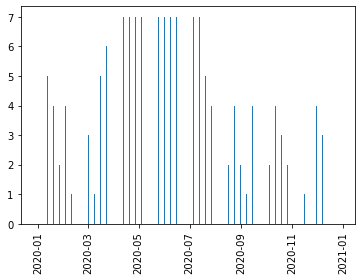

In [789]:
ax, fig = plt.subplots()
plt.bar(df['week'], df['meditation'])
plt.xticks(rotation=90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text major ticklabel objects>)

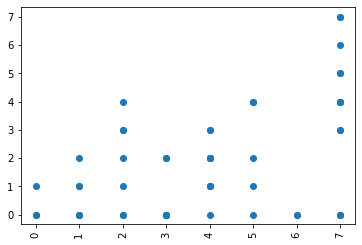

In [790]:
ax, fig = plt.subplots()
plt.scatter(df['meditation'], df['programming'])
plt.xticks(rotation=90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text major ticklabel objects>)

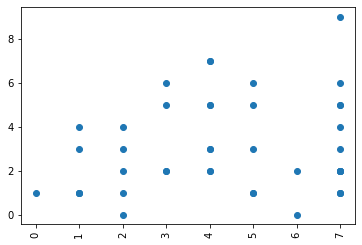

In [14]:
ax, fig = plt.subplots()
plt.scatter(meta_df['meditation'], meta_df['exercise'])
plt.xticks(rotation=90)

In [791]:
n=2
dim_redux = {"PCA":PCA(n_components=n), #"MDS": MDS(n_components=2), 
             #"FA":FactorAnalysis(n_components=n), 
             #"ISO":Isomap(n_components=n)
            }

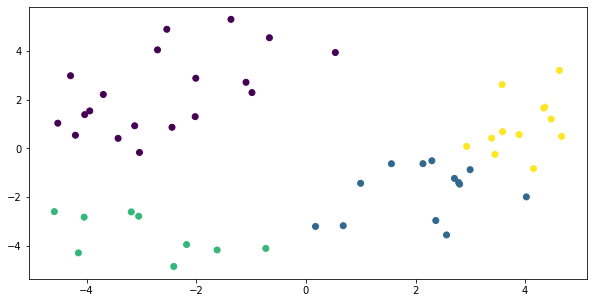

In [792]:
for key, reduction in dim_redux.items():
    reduction.fit(df[['meditation','programming','reading','running','walk dog','weights','yoga']])
    reduced_space = reduction.fit_transform(df[['meditation','programming','reading','running','walk dog','weights','yoga']])
    y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(reduced_space)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111,)# projection='3d')
    ax.scatter(reduced_space[:,0], reduced_space[:,1], c=y_pred )

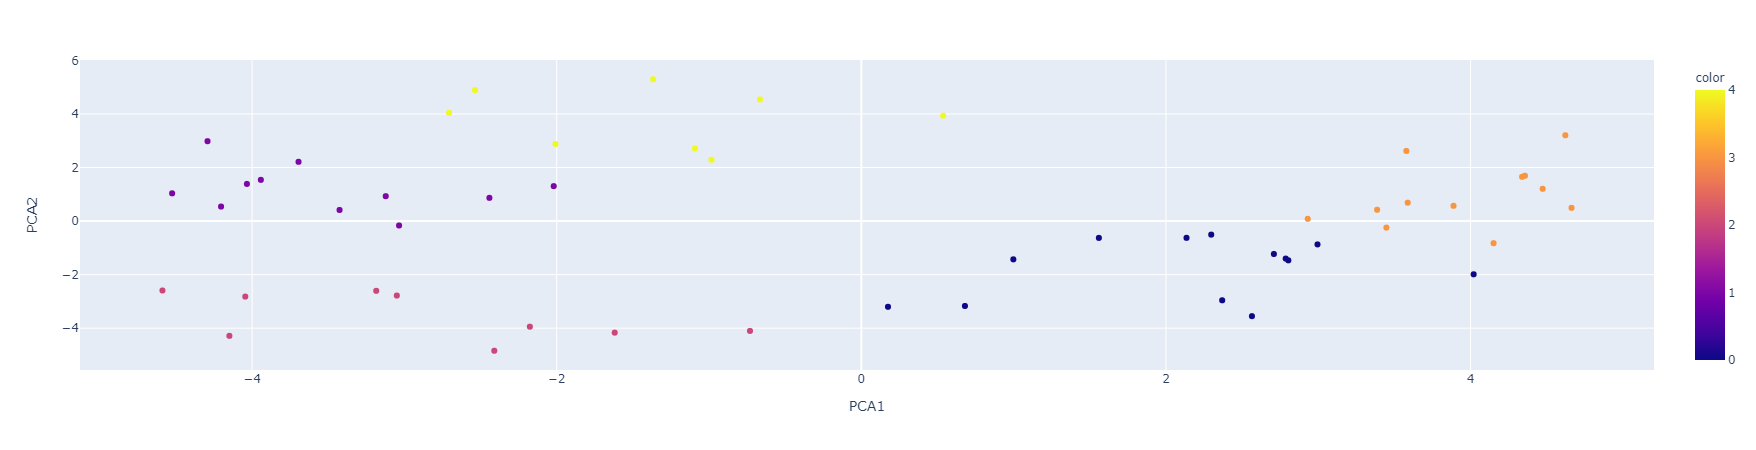

In [793]:
pca = PCA(n_components=n)
pca.fit(df[['meditation','programming','reading','running','walk dog','weights','yoga']])
#print(reduction.get_covariance())
reduced_space = pca.fit_transform(df[['meditation','programming','reading','running','walk dog','weights','yoga']])
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(reduced_space)
reduced_df = pd.DataFrame(reduced_space, columns=['PCA1','PCA2'])
fig = px.scatter(reduced_df, x='PCA1', y='PCA2', color=y_pred)
fig.show()
    

In [794]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)
print(np.ascontiguousarray(pca.get_covariance()))

[[ 5.16  2.49 -0.01  0.33 -2.01  0.45  0.54]
 [ 2.49  3.52  0.62  0.53  0.44  0.3   0.05]
 [-0.01  0.62  2.09  0.36  2.05  0.01 -0.36]
 [ 0.33  0.53  0.36  1.56  0.85  0.04 -0.13]
 [-2.01  0.44  2.05  0.85  8.14 -0.21 -1.28]
 [ 0.45  0.3   0.01  0.04 -0.21  1.41  0.06]
 [ 0.54  0.05 -0.36 -0.13 -1.28  0.06  1.6 ]]


In [795]:
1. Meditation and walking dog negitivly covary because i did most of my meditation in winter/sprint and that's when I started walking the dog. 
   Also walking the dog is the first thing I do in the morning instead of meditation 
    
2. 

SyntaxError: invalid syntax (<ipython-input-795-d5577d271624>, line 1)

In [ ]:
print("Meaing of the 2 coponents")
for component in pca.components_:
    print(" + ".join("%.2f x %s" % (value,name) for value, name in zip(component, ['meditation','programming','reading','running','walk dog','weights','yoga'] )))

In [ ]:
#How much each component explains the variation
print(pca.explained_variance_ratio_)

In [ ]:
meta_df.head()


In [501]:
y_pred = KMeans(n_clusters=6, random_state=0).fit_predict(meta_df[['knowledge', 'exercise', 'meditation']])
fig = px.scatter_3d(meta_df, x='knowledge', y='exercise', z='meditation', color=y_pred)
#fig.show()

In [21]:
pca = PCA(n_components=3)
pca.fit(df[['meditation','programming','reading','running','weights','yoga']])
#print(reduction.get_covariance())
reduced_space = pca.fit_transform(df[['meditation','programming','reading','running','weights','yoga']])
reduced_df = pd.DataFrame(reduced_space, columns=['PCA1','PCA2', 'PCA3'])
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(reduced_space)
reduced_df.head()

,PCA1,PCA2,PCA3
0,-4.681579,-0.168101,-1.871893
1,-0.853735,-0.118400,0.200285
2,0.150554,2.806648,2.730457
3,-0.082857,0.009208,-0.748493
4,-3.238892,1.506565,0.919598


In [503]:
#fig = px.scatter_3d(reduced_df, x='PCA1', y='PCA2', z='PCA3', color=y_pred)
#fig.show()

In [23]:
print(pca.explained_variance_ratio_)

[0.44 0.19 0.16]


In [504]:
pca = PCA(n_components=2)
pca.fit(meta_df[['knowledge', 'exercise', 'meditation']])
#print(reduction.get_covariance())
reduced_space = pca.fit_transform(meta_df[['knowledge', 'exercise', 'meditation']])
reduced_df = pd.DataFrame(reduced_space, columns=['PCA1','PCA2'])
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(reduced_space)
reduced_df.head()

#fig = px.scatter(reduced_df, x='PCA1', y='PCA2', color=y_pred)
#fig.show()

,PCA1,PCA2
0,-5.712664,-1.134774
1,-0.995982,-2.991058
2,-0.376491,-0.914370
3,-0.852276,-1.584293
4,-3.764854,-2.005460


In [121]:
query = "select date_trunc('day', a2.date::date ) as day, c2.name, COUNT(*) from activity a2 inner join category c2 on a2.category_fk = c2.id where a2.date > '01/01/2020'  group by  c2.\"name\", day  order by day"
dat = sqlio.read_sql_query(query, connection)
df_day = dat.pivot(index='day', columns='name')

df_day = df_day.fillna(0)
df_day.columns = df_day.columns.droplevel(0)
df_day = df_day.reset_index()
#df['week'] = df['week'].dt.strftime('%m/%d/%Y')
df_day.head()

name,day,meditation,programming,reading,running,walk dog,weights,yoga
0,2020-01-02 00:00:00-06:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2020-01-06 00:00:00-06:00,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2020-01-07 00:00:00-06:00,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2020-01-08 00:00:00-06:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-09 00:00:00-06:00,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [505]:
pca = PCA(n_components=n)
pca.fit(df_day[['meditation','programming','reading','running','walk dog','weights','yoga']])
#print(reduction.get_covariance())
reduced_space = pca.fit_transform(df_day[['meditation','programming','reading','running','walk dog','weights','yoga']])
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(reduced_space)
reduced_df = pd.DataFrame(reduced_space, columns=['PCA1','PCA2'])
#fig = px.scatter(reduced_df, x='PCA1', y='PCA2', color=y_pred)
#fig.show()
    

NameError: name 'df_day' is not defined

## Import some more data for visualization


In [ ]:


#daily['day'] = daily['date'].dt.strftime('%a')

In [797]:
#Get the data
query = "select date_trunc('day', a2.date::date ) as day, c2.name, COUNT(*) from activity a2 inner join category c2 on a2.category_fk = c2.id where a2.date > '12/31/2019' group by  c2.\"name\", day  order by day ;"
daily = sqlio.read_sql_query(query, connection)

#Rotate the table
daily = daily.pivot(index='day', columns='name')
#Fill in missing data
daily = daily.fillna(0)
#Drop redudent column
daily.columns = daily.columns.droplevel(0)
daily = daily.reset_index()

#Clean up date column
daily['day'] = daily['day'].astype('str')
daily['day'] = daily['day'].str.split(" ",n=1, expand= True)[0]
daily['day'] = pd.to_datetime(daily['day'],format='%Y-%m-%d')

#Fill in missing dates
daily.index = pd.DatetimeIndex(daily['day']).floor('D')
all_days =pd.date_range(daily.index.min(), daily.index.max(), freq='D')
daily = daily.loc[all_days]

#Remove reducent column
daily = daily.drop(['day'], axis=1)
#Fill in Missing data
daily = daily.fillna(0.0)
daily = daily.reset_index()
daily = daily.rename(columns={"index": "date"})
daily['day'] = daily['date'].dt.strftime('%a')

#Add meta category columns
daily['all'] =daily[['programming', 'reading','meditation','running','yoga','weights']].max(axis=1)
daily['mind'] =daily[['programming', 'reading', 'math']].max(axis=1)
daily['mind_sum'] =daily[['programming', 'reading', 'math']].sum(axis=1)
daily['body'] =daily[['running','yoga','weights']].max(axis=1)
daily['body_sum'] =daily[['running','yoga','weights']].sum(axis=1)
daily['sum']=daily[['programming', 'reading','meditation','running','yoga','weights']].sum(axis=1)

daily.tail()

C:\Users\zeusg\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



name,date,math,meditation,programming,reading,running,walk dog,weights,yoga,day,all,mind,mind_sum,body,body_sum,sum
358,2020-12-24,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,Thu,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
359,2020-12-25,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,Fri,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
360,2020-12-26,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,Sat,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
361,2020-12-27,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,Sun,1.00000,1.00000,1.00000,1.00000,1.00000,3.00000
362,2020-12-28,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,Mon,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000


In [837]:
pca = PCA(n_components=2)
pca.fit(daily[['meditation','programming', 'reading', 'math','running','yoga','weights']])
heat = np.ascontiguousarray(pca.get_covariance())

fig = go.Figure(data=go.Heatmap(
                   z=[[1, None, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'],
                   hoverongaps = False))
#fig.show()
print()

# Visualize 

## Visualize how frequent each activity happens each day

### All activities

In [833]:
mon = daily[daily['day'] == 'Mon']
tue = daily[daily['day'] == 'Tue']
wed = daily[daily['day'] == 'Wed']
thu = daily[daily['day'] == 'Thu']
fri = daily[daily['day'] == 'Fri']
sat = daily[daily['day'] == 'Sat']
sun = daily[daily['day'] == 'Sun']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['sum'].sum(),tue['sum'].sum(),wed['sum'].sum(),thu['sum'].sum(),fri['sum'].sum(),sat['sum'].sum(),sun['sum'].sum()]
))

#fig.show()
print()

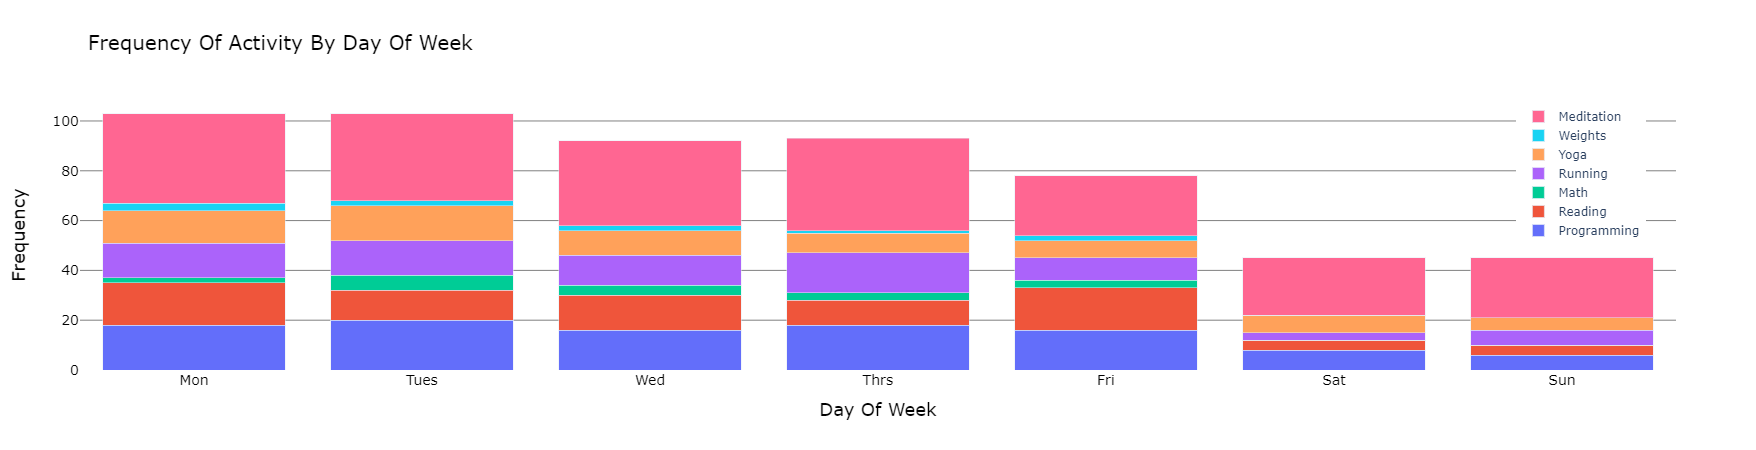

In [770]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['programming'].sum(),tue['programming'].sum(),wed['programming'].sum(),
       thu['programming'].sum(),fri['programming'].sum(),sat['programming'].sum(),
       sun['programming'].sum()],
    name="Programming",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['reading'].sum(),tue['reading'].sum(),wed['reading'].sum(),
       thu['reading'].sum(),fri['reading'].sum(),sat['reading'].sum(),
       sun['reading'].sum()],
    name="Reading",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['math'].sum(),tue['math'].sum(),wed['math'].sum(),
       thu['math'].sum(),fri['math'].sum(),sat['math'].sum(),
       sun['math'].sum()],
    name="Math",
))


fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['running'].sum(),tue['running'].sum(),wed['running'].sum(),
       thu['running'].sum(),fri['running'].sum(),sat['running'].sum(),
       sun['running'].sum()],
    name="Running",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['yoga'].sum(),tue['yoga'].sum(),wed['yoga'].sum(),
       thu['yoga'].sum(),fri['yoga'].sum(),sat['yoga'].sum(),
       sun['yoga'].sum()],
    name="Yoga",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['weights'].sum(),tue['weights'].sum(),wed['weights'].sum(),
       thu['weights'].sum(),fri['weights'].sum(),sat['weights'].sum(),
       sun['weights'].sum()],
    name="Weights",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['meditation'].sum(),tue['meditation'].sum(),wed['meditation'].sum(),
       thu['meditation'].sum(),fri['meditation'].sum(),sat['meditation'].sum(),
       sun['meditation'].sum()],
    name="Meditation",
))

fig.update_traces(hovertemplate='Instances: %{y}')

fig.update_xaxes(title_text='Day Of Week',
                 tickfont=dict( color='black', size=14),
                 title_font=dict(size=18, color='black'))

fig.update_yaxes(title_text='Frequency',
                 title_font=dict(size=18, color='black'),
                 nticks=8,
                 tickfont=dict( color='Black', size=14),
                 gridcolor='grey')

fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgba(256,256,256,1)', 
                  paper_bgcolor="rgba(256,256,256,1)",
                  title_text="Frequency Of Activity By Day Of Week",
                  title_font=dict(size=20, color='black'))




fig.update_layout(
    legend=dict(
        x=.9,
        y=1,
        bgcolor="White",
        bordercolor="White",
        borderwidth=2
    )
)


fig.show()
pio.write_html(fig, file='year_in_review/AllActivitiesBar.html', auto_open=False)

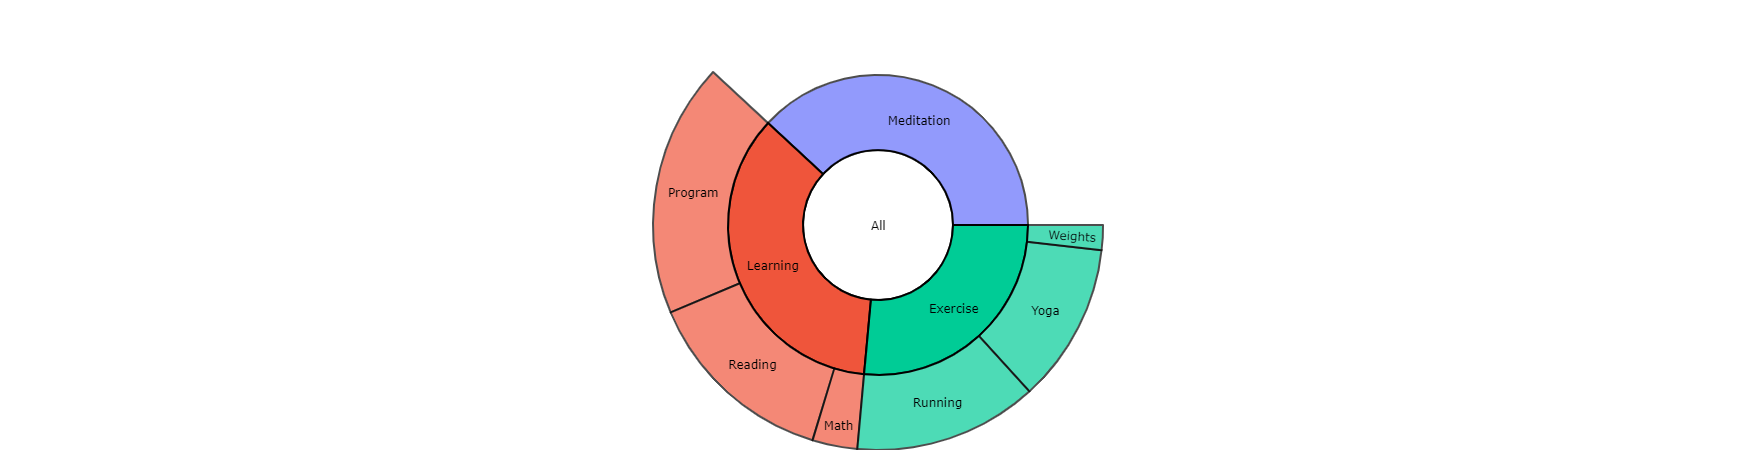

In [769]:
running_total = daily['running'].sum()
yoga_total = daily['yoga'].sum()
weights_total = daily['weights'].sum()
exercise_total = running_total + yoga_total+weights_total

programming_total = daily['programming'].sum()
reading_total = daily['reading'].sum()
math_total = daily['math'].sum()
learning_total = programming_total + reading_total+math_total

meditation_total = daily['meditation'].sum()

all_total = exercise_total + learning_total + meditation_total


fig =go.Figure(go.Sunburst(
    labels=["All", "Exercise", "Learning", "Meditation", "Running", "Weights", "Yoga", "Program", "Reading", "Math"],
    parents=["", "All", "All", "All", "Exercise", "Exercise", "Exercise", "Learning", "Learning", "Learning"],
    values=[all_total, exercise_total, learning_total, meditation_total, running_total, weights_total, yoga_total, programming_total, reading_total, math_total],
    branchvalues="total",
    textfont_color='Black',
    marker=dict( line=dict(color='#000000', width=2)),
    hovertemplate = "%{label}: <br>Days: %{value} <extra></extra> "
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.update_layout(plot_bgcolor='White', 
                  paper_bgcolor="White",
                  title_text="All Activities",
                  title_font=dict(size=18, color='Black'))

fig.show()
pio.write_html(fig, file='year_in_review/AllActivitiesSunBurst.html', auto_open=False)



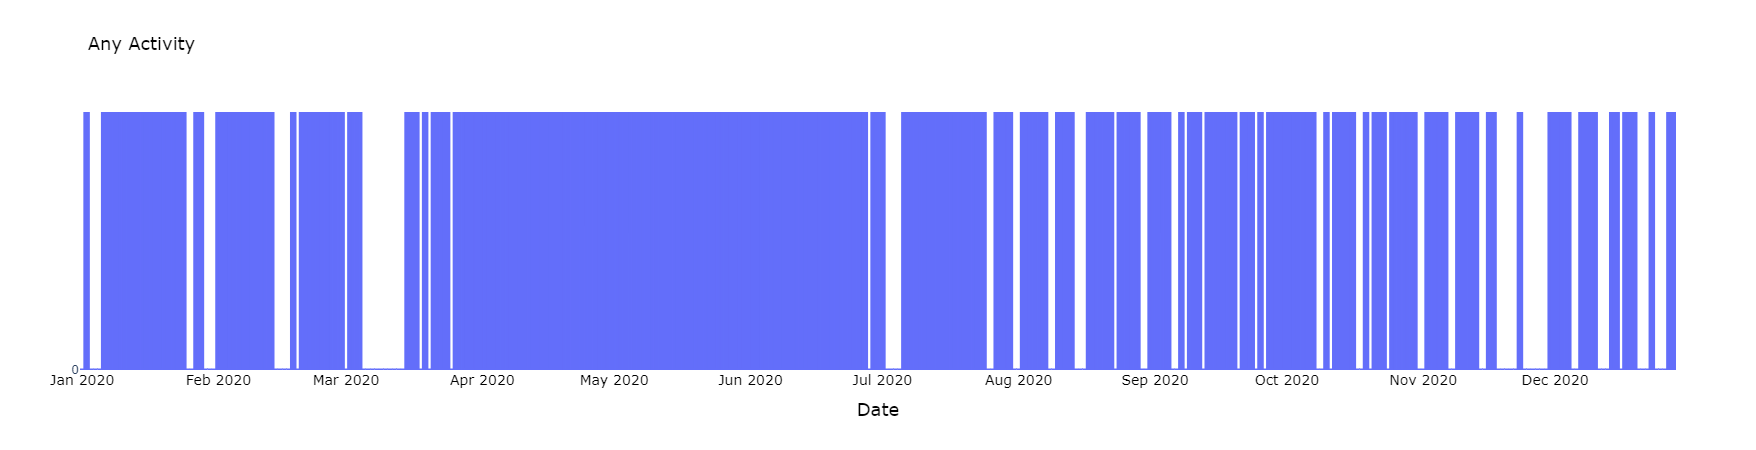

In [774]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily['date'], y=daily['all'], name="All", marker_line_color='#636EFA', marker_color='#636EFA',))

fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='Black', size=14),
                 nticks=12,
                 title_font=dict(size=18, color='Black'))
fig.update_yaxes(nticks=1)
fig.update_traces(hovertemplate='%{x}<extra></extra>')

fig.update_traces(marker_line_width=3)

fig.update_layout(plot_bgcolor='White', 
                  paper_bgcolor="White",
                  title_text="Any Activity",
                  title_font=dict(size=18, color='Black'))
fig.show()
pio.write_html(fig, file='year_in_review/AnyActivity.html', auto_open=False)

### Mind

In [832]:
#Calculate % of each activity
#total = daily['programming'].sum() + daily['reading'].sum()


fig = go.Figure()
fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['programming'].sum(),tue['programming'].sum(),wed['programming'].sum(),
       thu['programming'].sum(),fri['programming'].sum(),sat['programming'].sum(),
       sun['programming'].sum()],
    name="Programming",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['reading'].sum(),tue['reading'].sum(),wed['reading'].sum(),
       thu['reading'].sum(),fri['reading'].sum(),sat['reading'].sum(),
       sun['reading'].sum()],
    name="Reading",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['math'].sum(),tue['math'].sum(),wed['math'].sum(),
       thu['math'].sum(),fri['math'].sum(),sat['math'].sum(),
       sun['math'].sum()],
    name="Math",
))

fig.update_traces(hovertemplate='%{x}<extra></extra>')
fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='white', size=14),
                 title_font=dict(size=18, color='white'))

fig.update_yaxes(nticks=6,
                 tickfont=dict( color='white', size=14),)

fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgba(256,256,256,0)', 
                  paper_bgcolor="rgba(256,256,256,0)",
                  title_text="All Activities",
                  title_font=dict(size=18, color='white'))




fig.update_layout(
    legend=dict(
        x=.9,
        y=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            size=12,
            color="white"
        ),
        bgcolor="Black",
        bordercolor="Black",
        borderwidth=2
    )
)

#fig.show()
print()




In [831]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily['date'], y=daily['mind'], name="Mind"))

fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='white', size=14),
                 nticks=12,
                 title_font=dict(size=18, color='white'))
fig.update_yaxes(nticks=1)

fig.update_traces(marker_color='rgb(66, 135, 245)', marker_line_color='rgb(66, 135, 245)',
                  marker_line_width=4)

fig.update_layout(plot_bgcolor='rgba(256,256,256,0)', 
                  paper_bgcolor="rgba(256,256,256,0)",
                  title_text="Study Frequency",
                  title_font=dict(size=18, color='white'))
#fig.show()
print()

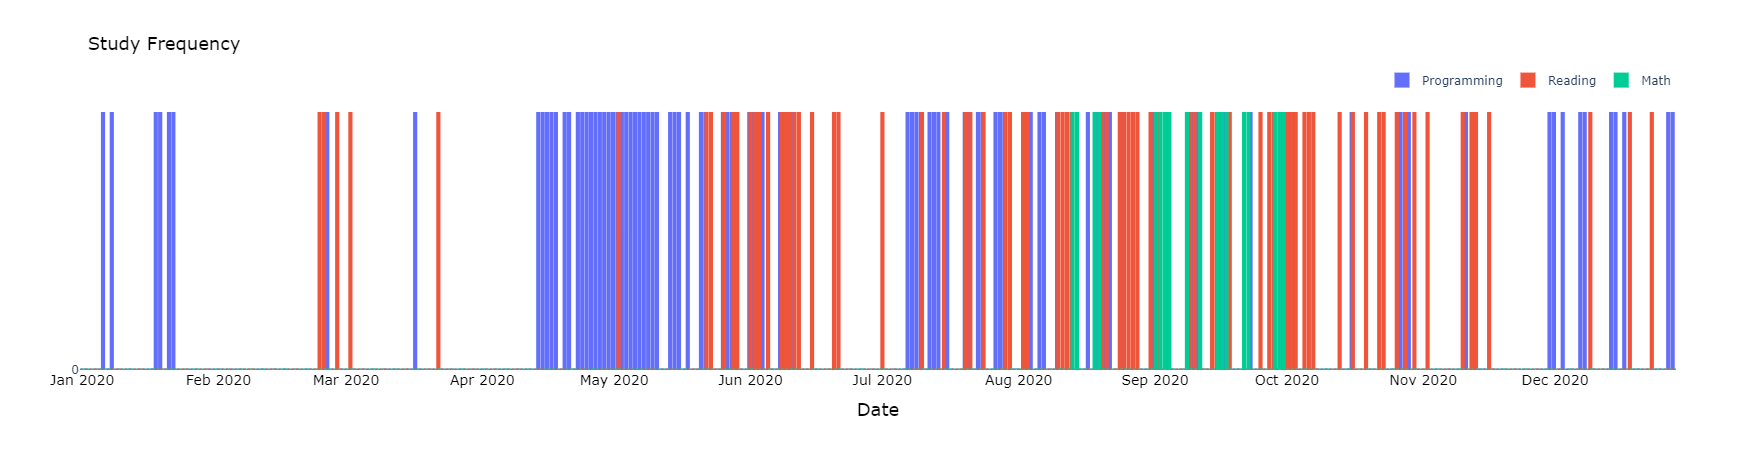

In [824]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily['date'], y=daily['programming'], name="Programming",marker_color='#636EFA', marker_line_color='#636EFA'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['reading'], name="Reading",marker_color='#EF553B', marker_line_color='#EF553B'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['math'], name="Math",marker_color='#00CC96', marker_line_color='#00CC96'))
fig.update_traces(hovertemplate='%{x}')
fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='Black', size=14),
                 nticks=12,
                 title_font=dict(size=18, color='Black'))
fig.update_yaxes(nticks=1)

fig.update_traces(marker_line_width=3)

fig.update_layout(plot_bgcolor='White', 
                  paper_bgcolor="White",
                  title_text="Study Frequency",
                  title_font=dict(size=18, color='Black'))

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()
pio.write_html(fig, file='year_in_review/StudyFrequency.html', auto_open=False)

In [827]:

#PIE Chart
study_labels = ["Programming", "Reading", "Math"]
study_values = [programming_total,  reading_total, math_total]

fig = go.Figure(data=[go.Pie(labels=study_labels, values=study_values,hole=.3)])
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=13,
                  textfont_color='white',
                  marker=dict( line=dict(color='#000000', width=2)))
fig.update_layout(plot_bgcolor='rgba(256,256,256,0)', 
                  paper_bgcolor="rgba(256,256,256,0)",
                  title_font=dict(size=18, color='white'))

fig.update_layout(
    title_font=dict(size=18, color='white'),
    title={
        'text': "Study Proportions",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    legend=dict(
        x=.6,
        y=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            size=12,
            color="white"
        ),
        bgcolor="rgba(256,256,256,0)"
    )
)
#fig.show()
print()

### Body

In [828]:

fig = go.Figure()
fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['running'].sum(),tue['running'].sum(),wed['running'].sum(),
       thu['running'].sum(),fri['running'].sum(),sat['running'].sum(),
       sun['running'].sum()],
    name="Running",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['yoga'].sum(),tue['yoga'].sum(),wed['yoga'].sum(),
       thu['yoga'].sum(),fri['yoga'].sum(),sat['yoga'].sum(),
       sun['yoga'].sum()],
    name="Yoga",
))

fig.add_trace(go.Bar(
    x=["Mon", "Tues", "Wed", "Thrs", "Fri", "Sat", "Sun"],
    y=[mon['weights'].sum(),tue['weights'].sum(),wed['weights'].sum(),
       thu['weights'].sum(),fri['weights'].sum(),sat['weights'].sum(),
       sun['weights'].sum()],
    name="Weights",
))

fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='black', size=14),
                 title_font=dict(size=18, color='black'))

fig.update_yaxes(nticks=6,
                 tickfont=dict(color='black', size=14),)

fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgba(256,256,256,1)', 
                  paper_bgcolor="rgba(256,256,256,1)",
                  title_text="All Activities",
                  title_font=dict(size=18, color='black'))




fig.update_layout(
    legend=dict(
        x=.9,
        y=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            size=12,
            color="Black"
        ),
        bgcolor="White",
        bordercolor="White",
        borderwidth=2
    )
)

#fig.show()
print()

In [829]:

#PIE Chart
exercise_labels = ["Running", "Yoga", "Weights"]
exercise_values = [running_total,  yoga_total, weights_total]

fig = go.Figure(data=[go.Pie(labels=exercise_labels, values=exercise_values, hole=.3)])
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=15,
                  textfont_color='white',
                  marker=dict( line=dict(color='#000000', width=2)))

fig.update_layout(plot_bgcolor='rgba(256,256,256,0)', 
                  paper_bgcolor="rgba(256,256,256,0)",
                  )

fig.update_layout(
    title_font=dict(size=18, color='white'),
    title={
        'text': "Excersie Frequency",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    legend=dict(
        x=.7,
        y=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            size=12,
            color="white"
        ),
        bgcolor="rgba(256,256,256,0)"
    )
)
#fig.show()
print()

In [830]:
fig = go.Figure()
fig.add_trace(go.Bar(x=mind['date'], y=body['body'], name="Body"))

fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='white', size=14),
                 nticks=12,
                 title_font=dict(size=18, color='white'))
fig.update_yaxes(nticks=1)

fig.update_traces(marker_color='rgb(66, 135, 245)', marker_line_color='rgb(66, 135, 245)',
                  marker_line_width=4)

fig.update_layout(plot_bgcolor='rgba(256,256,256,0)', 
                  paper_bgcolor="rgba(256,256,256,0)",
                  title_text="Excersie Frequency",
                  title_font=dict(size=18, color='white'))
#fig.show()
print()

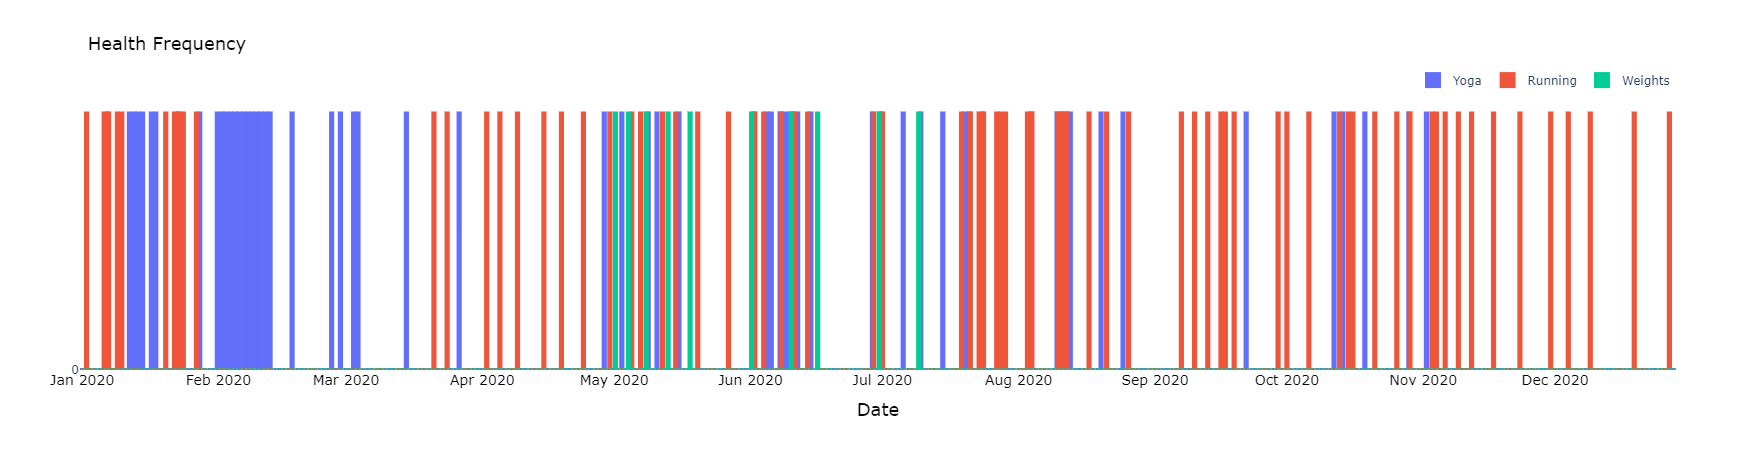

In [823]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily['date'], y=daily['yoga'], name="Yoga",marker_color='#636EFA', marker_line_color='#636EFA'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['running'], name="Running",marker_color='#EF553B', marker_line_color='#EF553B'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['weights'], name="Weights",marker_color='#00CC96', marker_line_color='#00CC96'))
fig.update_traces(hovertemplate='%{x}')
fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='Black', size=14),
                 nticks=12,
                 title_font=dict(size=18, color='Black'))
fig.update_yaxes(nticks=1)

fig.update_traces(marker_line_width=4)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_layout(plot_bgcolor='White', 
                  paper_bgcolor="White",
                  title_text="Health Frequency",
                  title_font=dict(size=18, color='Black'))
fig.show()
pio.write_html(fig, file='year_in_review/HealthFrequency.html', auto_open=False)

### Soul

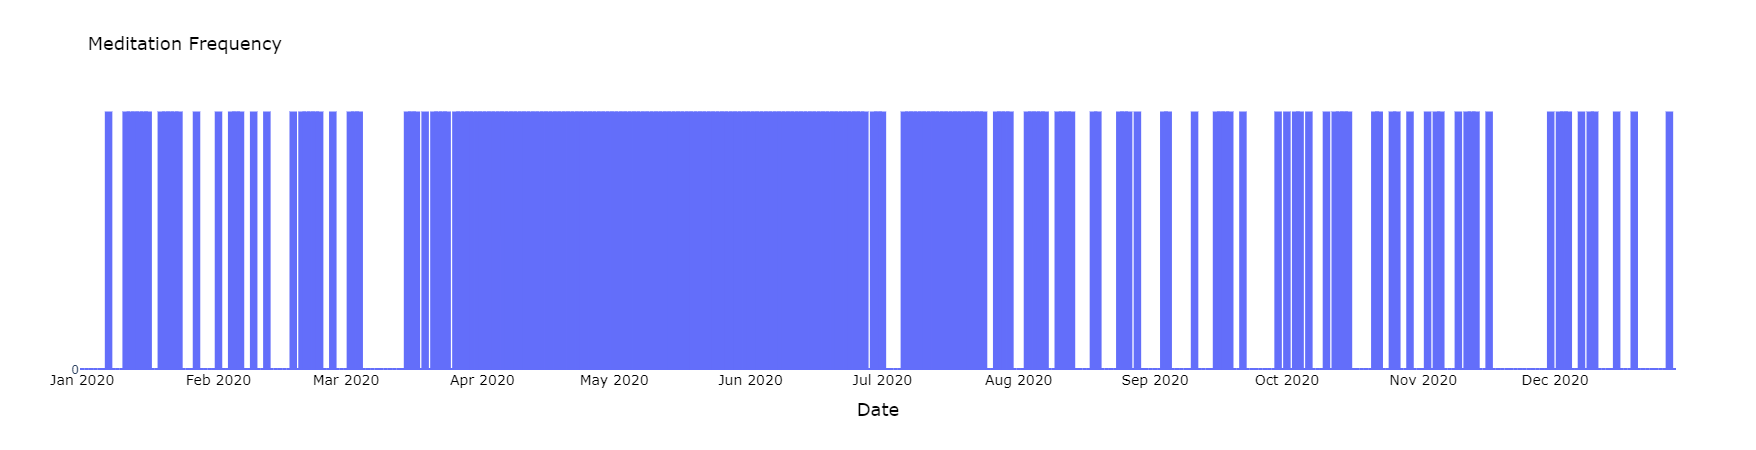

In [815]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily['date'], y=daily['meditation'], name="Meditation", marker_line_color='#636EFA', marker_color='#636EFA',))
fig.update_traces(hovertemplate='%{x}')
fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='Black', size=14),
                 nticks=12,
                 title_font=dict(size=18, color='Black'))
fig.update_yaxes(nticks=1)

fig.update_traces(marker_line_width=4)

fig.update_layout(plot_bgcolor='White', 
                  paper_bgcolor="White",
                  title_text="Meditation Frequency",
                  title_font=dict(size=18, color='Black'))
fig.show()
pio.write_html(fig, file='year_in_review/MeditationFrequency.html', auto_open=False)

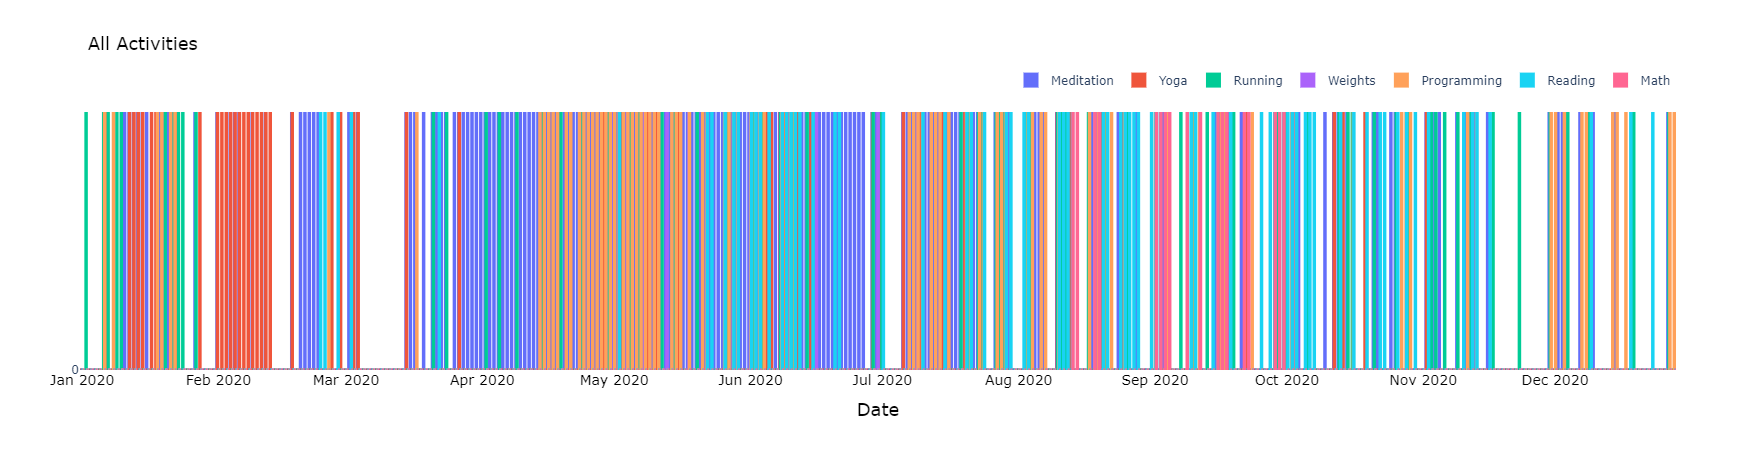

In [822]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily['date'], y=daily['meditation'], name="Meditation", marker_line_color='#636EFA', marker_color='#636EFA',))
fig.add_trace(go.Bar(x=daily['date'], y=daily['yoga'], name="Yoga",marker_color='#EF553B', marker_line_color='#EF553B'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['running'], name="Running",marker_color='#00CC96', marker_line_color='#00CC96'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['weights'], name="Weights",marker_color='#AB63FA', marker_line_color='#AB63FA'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['programming'], name="Programming",marker_color='#FFA15A', marker_line_color='#FFA15A'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['reading'], name="Reading",marker_color='#19D3F3', marker_line_color='#19D3F3'))
fig.add_trace(go.Bar(x=daily['date'], y=daily['math'], name="Math",marker_color='#FF6692', marker_line_color='#FF6692'))

fig.update_traces(hovertemplate='%{x}')
fig.update_xaxes(title_text='Date',
                 tickfont=dict( color='Black', size=14),
                 nticks=12,
                 title_font=dict(size=18, color='Black'))
fig.update_yaxes(nticks=1)

fig.update_traces(marker_line_width=3)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_layout(plot_bgcolor='White', 
                  paper_bgcolor="White",
                  title_text="All Activities",
                  title_font=dict(size=18, color='Black'))
fig.show()
pio.write_html(fig, file='year_in_review/AllFrequency2.html', auto_open=False)

# Google Fit

In [736]:
daily_summary = pd.read_csv(r"C:\Users\zeusg\OneDrive\Desktop\Takeout\Fit\Daily Aggregations\Daily Summaries.csv")
daily_summary.head()

,Date,Average weight (kg),Max weight (kg),Min weight (kg),Calories (kcal),Heart Points,Heart Minutes,Low latitude (deg),Low longitude (deg),High latitude (deg),...,Move Minutes count,Biking duration (ms),Inactive duration (ms),Walking duration (ms),Running duration (ms),Meditating duration (ms),Weight lifting duration (ms),Yoga duration (ms),High intensity interval training duration (ms),Guided breathing duration (ms)
0,01/01/2020,nan,nan,nan,1682.12371,1.00000,1.00000,30.45159,-84.27664,30.45471,...,62,nan,85186800,1025727,187473.00000,nan,nan,nan,nan,nan
1,01/02/2020,nan,nan,nan,1958.70278,38.00000,21.00000,30.45974,-84.26802,30.46607,...,90,nan,81691320,1285235,1483487.00000,nan,nan,nan,nan,nan
2,01/03/2020,nan,nan,nan,1631.94355,nan,nan,nan,nan,nan,...,25,nan,46107126,652367,nan,nan,nan,nan,nan,nan
3,01/04/2020,nan,nan,nan,1745.74166,7.00000,7.00000,38.22359,-85.69381,38.25190,...,96,nan,79816167,2459210,nan,nan,nan,nan,nan,nan
4,01/05/2020,nan,nan,nan,1717.19913,1.00000,1.00000,nan,nan,nan,...,42,nan,63350103,2003349,nan,nan,nan,nan,nan,nan


In [737]:
daily_summary.dtypes

Date                                               object
Average weight (kg)                               float64
Max weight (kg)                                   float64
Min weight (kg)                                   float64
Calories (kcal)                                   float64
Heart Points                                      float64
Heart Minutes                                     float64
Low latitude (deg)                                float64
Low longitude (deg)                               float64
High latitude (deg)                               float64
High longitude (deg)                              float64
Average heart rate (bpm)                          float64
Max heart rate (bpm)                              float64
Min heart rate (bpm)                              float64
Step count                                          int64
Distance (m)                                      float64
Average speed (m/s)                               float64
Max speed (m/s

In [738]:
daily_summary['Date'] = pd.to_datetime(daily_summary['Date'],format='%m/%d/%Y')
daily_summary['Month'] = pd.DatetimeIndex(daily_summary['Date']).month 

In [739]:
monthly_summary = daily_summary.groupby(['Month']).sum()
monthly_summary = monthly_summary.reset_index()
monthly_summary['Month'] = monthly_summary['Month'].apply(lambda x: calendar.month_abbr[x])
monthly_summary['Running duration (ms)'] = round(monthly_summary['Running duration (ms)']/3600000+ monthly_summary['High intensity interval training duration (ms)']/3600000,1)
monthly_summary['Weight lifting duration (ms)'] = monthly_summary['Weight lifting duration (ms)']/3600000
monthly_summary['Yoga duration (ms)'] = monthly_summary['Yoga duration (ms)']/3600000
#60000
monthly_summary

,Month,Average weight (kg),Max weight (kg),Min weight (kg),Calories (kcal),Heart Points,Heart Minutes,Low latitude (deg),Low longitude (deg),High latitude (deg),...,Move Minutes count,Biking duration (ms),Inactive duration (ms),Walking duration (ms),Running duration (ms),Meditating duration (ms),Weight lifting duration (ms),Yoga duration (ms),High intensity interval training duration (ms),Guided breathing duration (ms)
0,Jan,0.00000,0.00000,0.00000,53218.81129,98.00000,80.00000,694.14013,-1485.62684,694.27306,...,1652,0.00000,2421579521,53113228,0.90000,0.00000,0.00000,0.00000,0.00000,0.00000
1,Feb,0.00000,0.00000,0.00000,50091.80612,92.00000,91.00000,634.33076,-1319.23018,635.35447,...,1785,0.00000,2322866784,62196121,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,Mar,0.00000,0.00000,0.00000,53684.48563,160.00000,149.00000,886.90473,-1848.58007,888.14948,...,1614,1089801.00000,2494614417,64789961,0.30000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Apr,0.00000,0.00000,0.00000,53678.64887,638.00000,398.00000,718.14062,-1495.38154,718.30677,...,1756,0.00000,2476967441,49936960,4.00000,0.00000,0.00000,0.94426,225891.00000,0.00000
4,May,0.00000,0.00000,0.00000,61185.37847,1081.00000,754.00000,1094.57386,-2291.10340,1096.87706,...,4110,0.00000,2449771350,103744150,6.40000,0.00000,2.39748,2.72235,0.00000,0.00000
5,Jun,0.00000,0.00000,0.00000,58130.42318,844.00000,649.00000,1120.13862,-2422.01722,1125.10013,...,3952,0.00000,2283541605,105549516,3.70000,0.00000,3.24543,2.59316,0.00000,0.00000
6,Jul,0.00000,0.00000,0.00000,60048.83568,935.00000,665.00000,1225.22040,-2549.12506,1225.55522,...,3549,0.00000,2396553704,102461394,5.30000,0.00000,1.02190,1.76079,0.00000,0.00000
7,Aug,0.00000,0.00000,0.00000,57879.54145,730.00000,531.00000,1140.65151,-2375.02799,1140.78112,...,2436,0.00000,2460734294,97377787,3.60000,0.00000,0.00000,0.17508,0.00000,0.00000
8,Sep,0.00000,0.00000,0.00000,59280.84514,521.00000,420.00000,1225.08915,-2550.91346,1225.30659,...,2294,0.00000,2311450878,165435636,1.80000,0.00000,0.00000,0.00000,0.00000,0.00000
9,Oct,0.00000,0.00000,0.00000,64311.47150,578.00000,489.00000,1263.72291,-2646.43637,1265.74437,...,2670,0.00000,2230662853,220782444,1.70000,0.00000,0.00000,0.00000,0.00000,0.00000


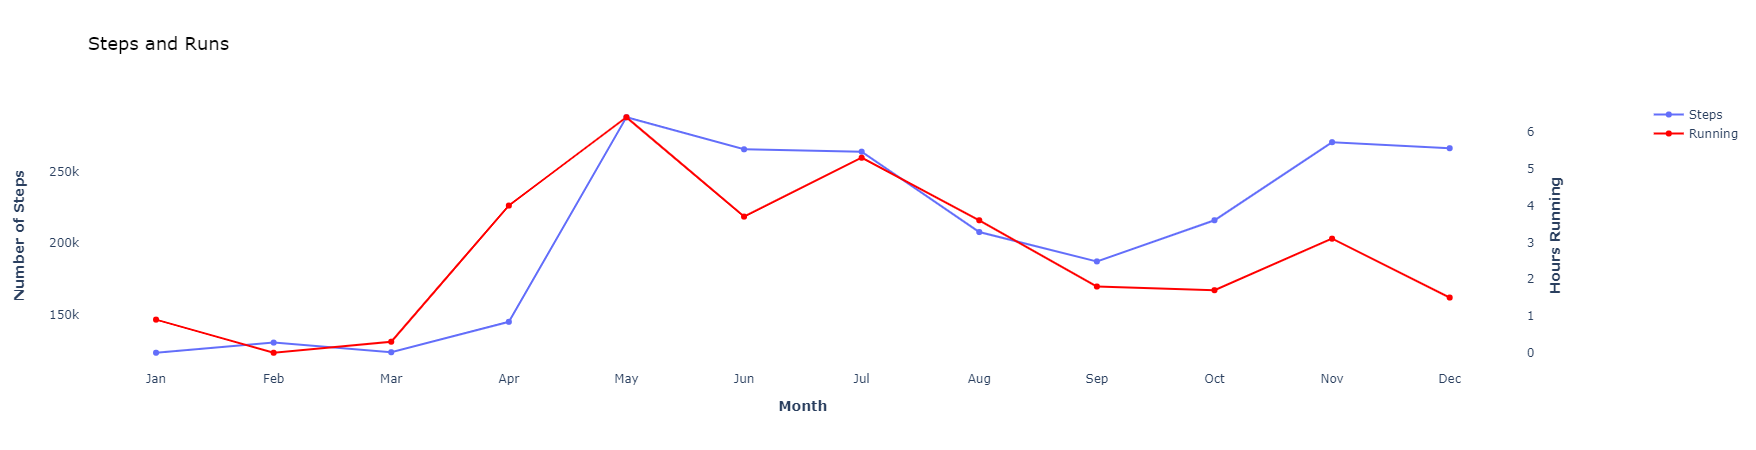

In [744]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Step count'], name="Steps", marker_line_color='#636EFA', marker_color='#636EFA',))
fig.add_trace(go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Running duration (ms)'], name="Running", marker_line_color='red', marker_color='red',), secondary_y=True,)
fig.update_layout(hovermode='x')
fig.update_yaxes(title_text="<b>Number of Steps</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Hours Running</b>", secondary_y=True)
fig.update_xaxes(title_text="<b>Month</b>")

fig.update_layout(plot_bgcolor='White', 
                  paper_bgcolor="White",
                  title_text="Steps and Runs",
                  title_font=dict(size=18, color='Black'))
fig.show()

pio.write_html(fig, file='year_in_review/StepsRun.html', auto_open=False)

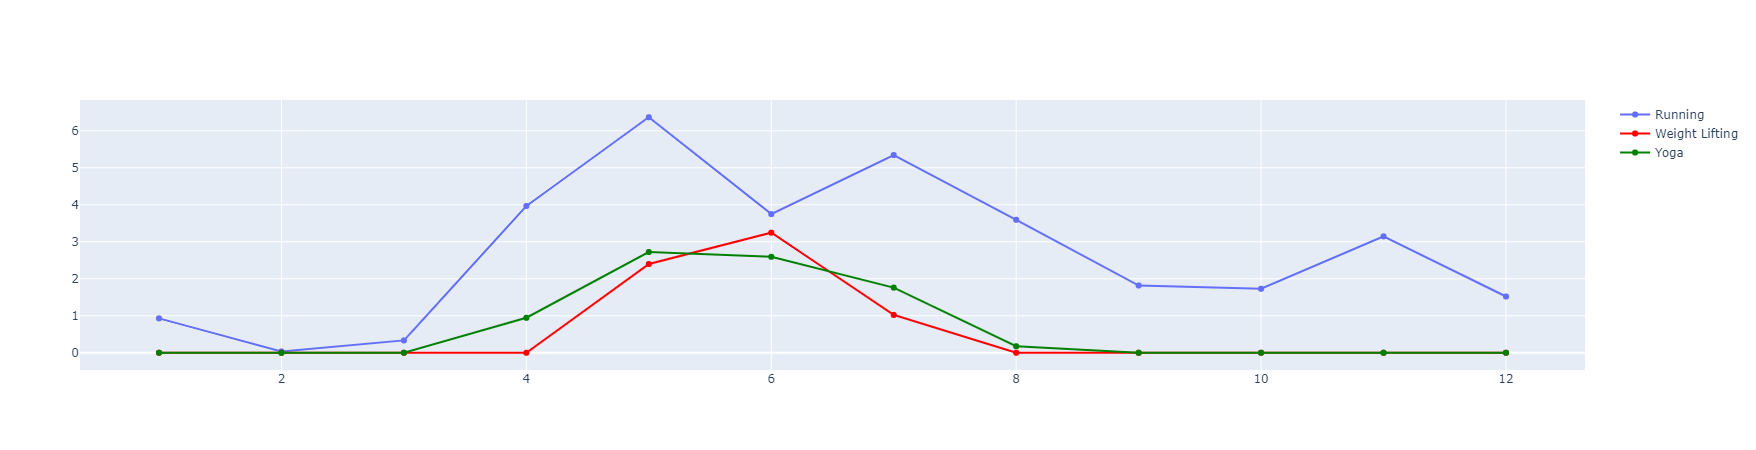

In [641]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Running duration (ms)'], name="Running", marker_line_color='#636EFA', marker_color='#636EFA',))
fig.add_trace(go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Weight lifting duration (ms)'], name="Weight Lifting", marker_line_color='red', marker_color='red',))
fig.add_trace(go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Yoga duration (ms)'], name="Yoga", marker_line_color='green', marker_color='green',))

fig.show()

In [644]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#pd.reset_option('display.float_format')
Totals = monthly_summary.sum()
Totals

Month                                                     78.00000
Average weight (kg)                                        0.00000
Max weight (kg)                                            0.00000
Min weight (kg)                                            0.00000
Calories (kcal)                                       694777.33274
Heart Points                                            6855.00000
Heart Minutes                                           5155.00000
Low latitude (deg)                                     12405.53090
Low longitude (deg)                                   -26002.80522
High latitude (deg)                                    12420.77579
High longitude (deg)                                  -25981.81068
Average heart rate (bpm)                                7267.05505
Max heart rate (bpm)                                    9211.87500
Min heart rate (bpm)                                    4907.31250
Step count                                           2486281.0

Step count  2,486,281

Walked: 947.1834487 Miles

Ran: 32.5 hrs

Yoga: 6 hrs

Weight Lifting: 6 hrs


In [ ]:
#https://www.mapdevelopers.com/distance_from_to.php